# MNIST digit classification on shuffled pixels with and without hidden layers


In this notebook you will use the MNIST dataset for a classification task. You will compare a the performace of a fully connected neural network with and without hidden layers.


**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of digits and want to classify them into the right label (0-9). Note that we will shuffle the pixels in an image randomly.

**Content:**
* load the original MNIST data
* shuffle the pixels of the images in the MNIST data
* visualize samples of the data
* flatten the data
* use keras to train a fcNN with and without hidden layers and compare the perfomance on new unseen test data

#### Imports

In the next two cells, we load all the required libraries and functions. We download the MNIST data, normalize the pixelvalues to be between 0 and 1, and seperate it into a training and validation set.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers






#### Loading and preparing the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Let's visualize the first 4 MNIST images before shuffling the pixels randomly around. It is very easy to recognise the true label of the digits.

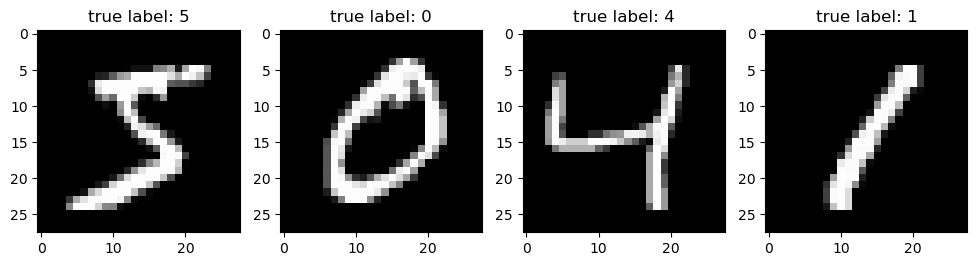

In [3]:
# visualize the 4 first mnist images before shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

Here we define a function to shuffle the pixels around. All images are shuffled in the same way.

In [4]:
# function to shuffle the pixel order within an image
# used to shuffel the pixels of all mnist images in the same manner

def shuffel_pixels(idx, data):
    data_new=np.zeros((data.shape))
    for i,img in enumerate(data):
        data_new[i] = img.flatten()[idx].reshape((28,28,1))
    return data_new

In [5]:
np.random.seed(42)
shuffel_idx = np.random.permutation(np.arange(28*28))
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

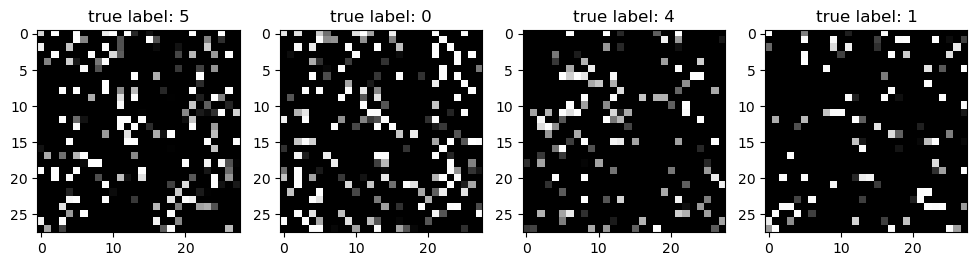

In [6]:
# visualize the 4 first mnist images after shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train_shuffle[i,:,:,0]),cmap="gray")
    plt.title('true label: '+str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

## fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the shffled MNIST data.
We use two network architectures:
* fcnn with no hidden layers
* fcnn with two hidden layers (100 and 50)


Because we will use fcNN we need to flatten our inuput into a 1d vector. We do this in the next cell with reshape.

In [7]:
# prepare data for fcNN - we need a vector as input
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

### Train the fcNN on the data

In [8]:
# check the shape
X_train_shuffle_flat.shape,Y_train.shape,X_val_shuffle_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the nework. In the output we predict the probability for the 10 digits with the softmax actication function.

In [9]:
# define fcNN
model = Sequential()

model.add(Dense(10, batch_input_shape=(None, 784),activation="softmax"))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# train the model
history=model.fit(X_train_shuffle_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_shuffle_flat, Y_val)
                 )

Epoch 1/10
391/391 - 0s - loss: 0.7335 - accuracy: 0.8177 - val_loss: 0.3936 - val_accuracy: 0.9003 - 487ms/epoch - 1ms/step
Epoch 2/10
391/391 - 0s - loss: 0.3869 - accuracy: 0.8960 - val_loss: 0.3256 - val_accuracy: 0.9130 - 283ms/epoch - 724us/step
Epoch 3/10
391/391 - 0s - loss: 0.3371 - accuracy: 0.9082 - val_loss: 0.2991 - val_accuracy: 0.9194 - 265ms/epoch - 678us/step
Epoch 4/10
391/391 - 0s - loss: 0.3132 - accuracy: 0.9124 - val_loss: 0.2849 - val_accuracy: 0.9211 - 256ms/epoch - 655us/step
Epoch 5/10
391/391 - 0s - loss: 0.2991 - accuracy: 0.9167 - val_loss: 0.2778 - val_accuracy: 0.9236 - 263ms/epoch - 673us/step
Epoch 6/10
391/391 - 0s - loss: 0.2899 - accuracy: 0.9195 - val_loss: 0.2719 - val_accuracy: 0.9252 - 259ms/epoch - 663us/step
Epoch 7/10
391/391 - 0s - loss: 0.2830 - accuracy: 0.9210 - val_loss: 0.2665 - val_accuracy: 0.9264 - 259ms/epoch - 662us/step
Epoch 8/10
391/391 - 0s - loss: 0.2774 - accuracy: 0.9229 - val_loss: 0.2640 - val_accuracy: 0.9266 - 261ms/epoch

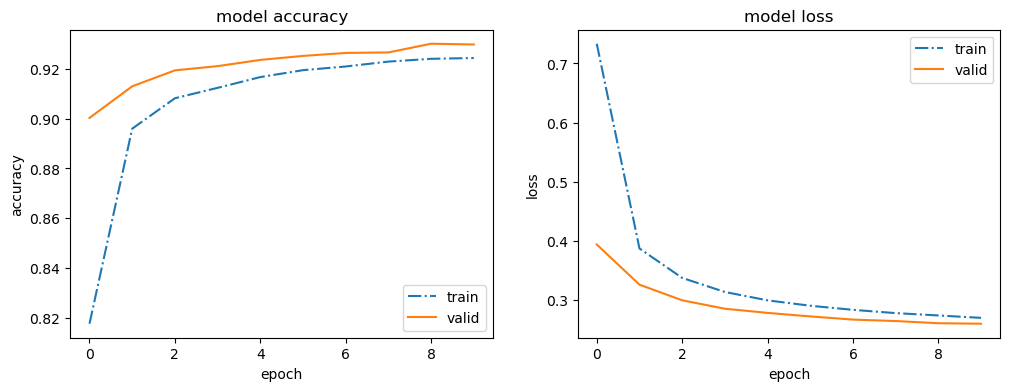

In [12]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

#### Prediction on the test set

Now, let's use the fcNN that was trained to predict new unseen data (our testdata).
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.


313/313 [==============================] - 0s 307us/step
Accuracy =  0.9243


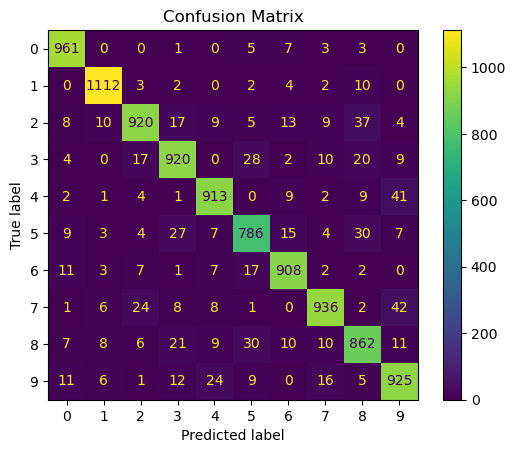

In [13]:
# predict each instance of the testset
pred=model.predict(X_test_shuffle_flat)
# get confusion matrix
cm = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1))

acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Accuracy = " , acc_fc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### Train the second fcNN on the data

Now, we define the nework with two hidden layers (100, 50). We use the sigmoid activation function on the hidden layers. In the output we predict the probability for the 10 digits with the softmax actication function.

In [14]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 8406

In [16]:
# train the model
history=model.fit(X_train_shuffle_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_shuffle_flat, Y_val)
                 )

Epoch 1/10
391/391 - 1s - loss: 0.9977 - accuracy: 0.7833 - val_loss: 0.3926 - val_accuracy: 0.9086 - 622ms/epoch - 2ms/step
Epoch 2/10
391/391 - 0s - loss: 0.3354 - accuracy: 0.9129 - val_loss: 0.2540 - val_accuracy: 0.9303 - 441ms/epoch - 1ms/step
Epoch 3/10
391/391 - 0s - loss: 0.2472 - accuracy: 0.9311 - val_loss: 0.2062 - val_accuracy: 0.9417 - 435ms/epoch - 1ms/step
Epoch 4/10
391/391 - 0s - loss: 0.2016 - accuracy: 0.9426 - val_loss: 0.1765 - val_accuracy: 0.9505 - 442ms/epoch - 1ms/step
Epoch 5/10
391/391 - 0s - loss: 0.1701 - accuracy: 0.9511 - val_loss: 0.1573 - val_accuracy: 0.9555 - 430ms/epoch - 1ms/step
Epoch 6/10
391/391 - 0s - loss: 0.1461 - accuracy: 0.9585 - val_loss: 0.1408 - val_accuracy: 0.9593 - 436ms/epoch - 1ms/step
Epoch 7/10
391/391 - 0s - loss: 0.1257 - accuracy: 0.9640 - val_loss: 0.1297 - val_accuracy: 0.9617 - 438ms/epoch - 1ms/step
Epoch 8/10
391/391 - 0s - loss: 0.1096 - accuracy: 0.9684 - val_loss: 0.1183 - val_accuracy: 0.9656 - 436ms/epoch - 1ms/step


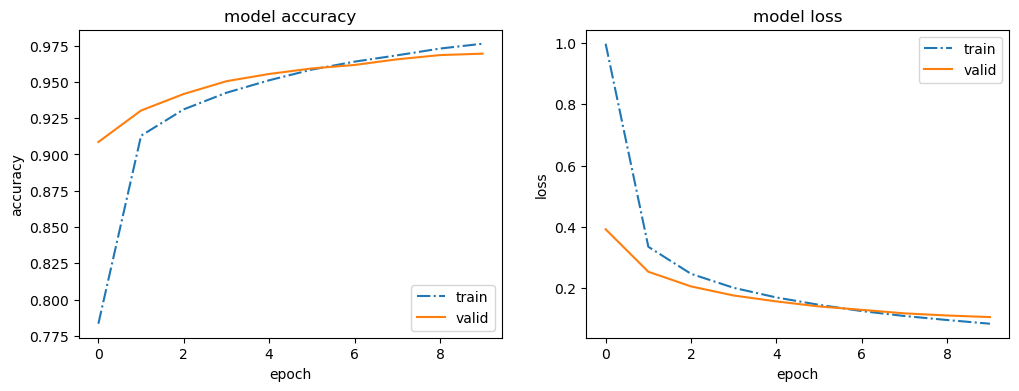

In [17]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

313/313 [==============================] - 0s 404us/step
Accuracy =  0.9674


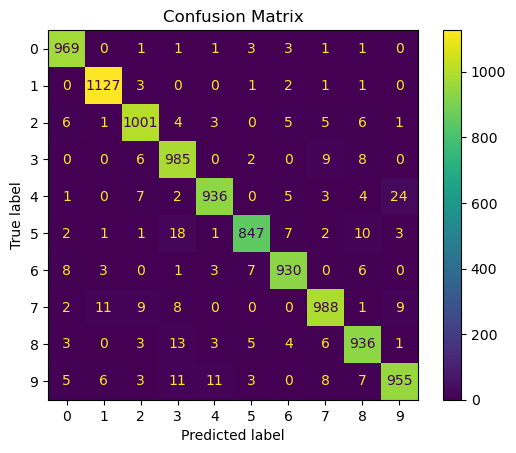

In [18]:
# predict each instance of the testset
pred=model.predict(X_test_shuffle_flat)
# get confusion matrix
cm = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1))

acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Accuracy = " , acc_fc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

## Exercise

Compare the performace of the fully connected neural networks on the original and the shuffled Mnist data.  
What do you observe?
How do you explain your observation?  

In [18]:
performance is nearly the same. it does not depend on imags, it depends on patterns of pixels.